## Sumbit example

In [24096]:
import pandas as pd
import numpy as np

In [24097]:
DATA_PATH = "/home/arnemkova/ML_labs/lab2/train.csv"

Посмотрим на табличку)

In [24098]:
train_df = pd.read_csv(DATA_PATH)
test_df = pd.read_csv("/home/arnemkova/ML_labs/lab2/test.csv")

train_df.head()

,Unnamed: 0,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,date_of_registration
0,6622,ecom,6488536.0,NaN,0,82221,0,0,18.450527,0.461750,2020-04-21 16:04:41.817367072
1,2047,information_source,874840.0,21100.0,0,12872,0,0,10.721619,-0.022317,2024-07-19 23:50:07.268931816
2,1118,information_source,571210.0,94707.0,0,0,7420,0,1.922243,0.046396,2024-07-13 16:35:54.794883135
3,4992,news,89534.0,924.0,0,834,0,0,2.149243,-0.093360,2024-09-10 21:29:14.006315095
4,9970,information_source,1043953.0,289288.0,0,58375,20260,3948,3.764965,0.027303,2024-05-26 11:07:15.950527838


Теперь посмотрим чё там по данным внутри

In [24099]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             8000 non-null   int64  
 1   category               8000 non-null   object 
 2   clicks                 7727 non-null   float64
 3   likes                  7624 non-null   float64
 4   buys                   8000 non-null   int64  
 5   4xx_errors             8000 non-null   int64  
 6   5xx_errors             8000 non-null   int64  
 7   complaints_count       7527 non-null   object 
 8   average_dwelltime      8000 non-null   float64
 9   source_attractiveness  8000 non-null   float64
 10  date_of_registration   8000 non-null   object 
dtypes: float64(4), int64(4), object(3)
memory usage: 687.6+ KB


Посмотрим на статические характеристики

In [24100]:
train_df.describe()

,Unnamed: 0,clicks,likes,buys,4xx_errors,5xx_errors,average_dwelltime,source_attractiveness
count,8000.000000,7.727000e+03,7.624000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8000.000000,8000.000000
mean,5006.138875,2.749785e+06,5.985027e+05,5.810509e+05,8.204958e+04,2.769224e+04,6.979549,0.191997
std,2893.886162,4.699120e+06,1.978345e+06,2.262221e+06,1.555219e+05,7.946935e+04,10.004924,0.227873
min,0.000000,5.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000,-0.681718
25%,2493.250000,3.599210e+05,0.000000e+00,0.000000e+00,2.943000e+03,0.000000e+00,1.503928,0.038220
50%,5035.000000,1.097221e+06,3.399550e+04,0.000000e+00,2.671750e+04,0.000000e+00,4.022802,0.154256
75%,7521.250000,2.915358e+06,2.860638e+05,0.000000e+00,9.500225e+04,2.016375e+04,8.899400,0.282510
max,9999.000000,6.203206e+07,5.582181e+07,4.277391e+07,2.904996e+06,1.865588e+06,211.218066,1.355736


Имеется столбец "Unnemed: 0" он нам не нужен - дропаем его

In [24101]:
train_df = train_df.drop("Unnamed: 0", axis=1)

Посмотрим колличество пропусков

In [24102]:
train_df.isnull().sum()

category                   0
clicks                   273
likes                    376
buys                       0
4xx_errors                 0
5xx_errors                 0
complaints_count         473
average_dwelltime          0
source_attractiveness      0
date_of_registration       0
dtype: int64

Видим, что столбцы "clicks", "likes" содержат NaN значения

Также обнаружили, что столбец "complaints_count" содержит значения "-"

Удалим их из обучающего набора(тк остаётся довольно много данных) и заменим на медианные значения в тестовом

In [24103]:
train_df["complaints_count"] = train_df["complaints_count"].replace("-", np.nan)
train_df["complaints_count"] = pd.to_numeric(train_df["complaints_count"])
train_df = train_df[train_df["complaints_count"] > 0]
train_df["average_dwelltime"] = train_df["average_dwelltime"].replace(-1, np.nan)

test_df["complaints_count"] = test_df["complaints_count"].replace("-", np.nan)
test_df["complaints_count"] = pd.to_numeric(test_df["complaints_count"])
test_df["average_dwelltime"] = test_df["average_dwelltime"].replace(-1, np.nan)

numeric_columns = ["clicks", "likes", "buys", "4xx_errors", "complaints_count", "average_dwelltime"]
test_df[numeric_columns] = test_df[numeric_columns].fillna(test_df[numeric_columns].median())
train_df = train_df.dropna()

In [24104]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4845 entries, 4 to 7998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   category               4845 non-null   object 
 1   clicks                 4845 non-null   float64
 2   likes                  4845 non-null   float64
 3   buys                   4845 non-null   int64  
 4   4xx_errors             4845 non-null   int64  
 5   5xx_errors             4845 non-null   int64  
 6   complaints_count       4845 non-null   float64
 7   average_dwelltime      4845 non-null   float64
 8   source_attractiveness  4845 non-null   float64
 9   date_of_registration   4845 non-null   object 
dtypes: float64(5), int64(3), object(2)
memory usage: 416.4+ KB


Приведем все к целочисленному типу.

In [24105]:
train_df["clicks"] = train_df["clicks"].astype(np.int64)
train_df["likes"] = train_df["likes"].astype(np.int64)
train_df["complaints_count"] = train_df["complaints_count"].astype(np.int64)

test_df["clicks"] = test_df["clicks"].astype(np.int64)
test_df["likes"] = test_df["likes"].astype(np.int64)
test_df["complaints_count"] = test_df["complaints_count"].astype(np.int64)

In [24106]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4845 entries, 4 to 7998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   category               4845 non-null   object 
 1   clicks                 4845 non-null   int64  
 2   likes                  4845 non-null   int64  
 3   buys                   4845 non-null   int64  
 4   4xx_errors             4845 non-null   int64  
 5   5xx_errors             4845 non-null   int64  
 6   complaints_count       4845 non-null   int64  
 7   average_dwelltime      4845 non-null   float64
 8   source_attractiveness  4845 non-null   float64
 9   date_of_registration   4845 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 416.4+ KB


Преобразуем столбец "date_of_registration", пострим из него признак, отвечающий за возраст домена

In [24107]:
train_df["date_of_registration"] = pd.to_datetime(train_df["date_of_registration"])
train_df["domen_age"] = (pd.Timestamp('now') - train_df["date_of_registration"]) / pd.Timedelta(days=365)
train_df = train_df.drop("date_of_registration", axis=1)

test_df["date_of_registration"] = pd.to_datetime(test_df["date_of_registration"])
test_df["domen_age"] = (pd.Timestamp('now') - test_df["date_of_registration"]) / pd.Timedelta(days=365)
test_df = test_df.drop("date_of_registration", axis=1)

In [24108]:
def create_features(df) :

    # Отношение лайков к кликам
    df['engagement_rate'] = df['likes'] / df['clicks'].replace(0, 1)

    # Коэффициент конверсии
    df['conversion_rate'] = df['buys'] / df['clicks'].replace(0, 1)

    # Отношение ошибок к кликам
    df['4xx_errors_per_click'] = df['4xx_errors'] / df['clicks'].replace(0, 1)
    df['5xx_errors_per_click'] = df['5xx_errors'] / df['clicks'].replace(0, 1)
    
    # Общая активность
    df['activ'] = df['average_dwelltime'] * df['clicks']

    # Жалобы на домен
    df['complaints_per_click'] = df['complaints_count'] / df['clicks'].replace(0, 1)
    
    return df

train_df = create_features(train_df)
test_df = create_features(test_df)

train_df.head()

,category,clicks,likes,buys,4xx_errors,5xx_errors,complaints_count,average_dwelltime,source_attractiveness,domen_age,engagement_rate,conversion_rate,4xx_errors_per_click,5xx_errors_per_click,activ,complaints_per_click
4,information_source,1043953,289288,0,58375,20260,3948,3.764965,0.027303,0.390315,0.277108,0.000000,0.055917,0.019407,3.930447e+06,0.003782
6,porn,99712,0,0,0,15178,3725,20.786928,0.063572,1.475869,0.000000,0.000000,0.000000,0.152218,2.072706e+06,0.037358
7,ecom,31677060,8760379,0,924098,0,8519,8.066347,0.080541,0.655823,0.276553,0.000000,0.029172,0.000000,2.555182e+08,0.000269
9,ecom,1695855,0,1601683,78271,0,1171,9.834370,0.757402,1.268372,0.000000,0.944469,0.046154,0.000000,1.667767e+07,0.000691
10,ecom,1726730,1022561,548138,14895,18118,3668,5.436714,0.476799,1.324259,0.592195,0.317443,0.008626,0.010493,9.387737e+06,0.002124


Удалим старые столбцы

In [24109]:
columns_to_drop = [
    'likes', 
    'clicks', 
    'buys', 
    '4xx_errors', 
    '5xx_errors', 
    'complaints_count', 
    'average_dwelltime',
]

train_df = train_df.drop(columns=columns_to_drop, axis=1)
test_df = test_df.drop(columns=columns_to_drop, axis=1)

Преобразуем категориальные переменные

In [24110]:
categories = train_df["category"].unique()

In [24111]:
train_df = pd.get_dummies(train_df, columns=['category'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['category'], drop_first=True)

In [24112]:
train_df.head()

,source_attractiveness,domen_age,engagement_rate,conversion_rate,4xx_errors_per_click,5xx_errors_per_click,activ,complaints_per_click,category_information_source,category_news,category_porn,category_social
4,0.027303,0.390315,0.277108,0.000000,0.055917,0.019407,3.930447e+06,0.003782,True,False,False,False
6,0.063572,1.475869,0.000000,0.000000,0.000000,0.152218,2.072706e+06,0.037358,False,False,True,False
7,0.080541,0.655823,0.276553,0.000000,0.029172,0.000000,2.555182e+08,0.000269,False,False,False,False
9,0.757402,1.268372,0.000000,0.944469,0.046154,0.000000,1.667767e+07,0.000691,False,False,False,False
10,0.476799,1.324259,0.592195,0.317443,0.008626,0.010493,9.387737e+06,0.002124,False,False,False,False


In [24113]:
import matplotlib.pyplot as plt
import seaborn as sns

Посмотрим на распределение привлекательности

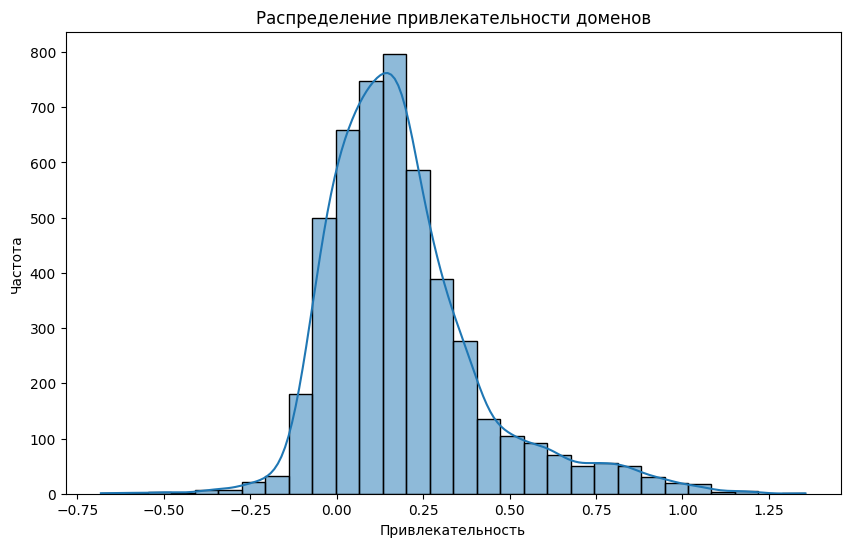

In [24114]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df["source_attractiveness"], bins=30, kde=True)
plt.title("Распределение привлекательности доменов")
plt.xlabel("Привлекательность")
plt.ylabel("Частота")
plt.show()

Построим корреляционную матрицу

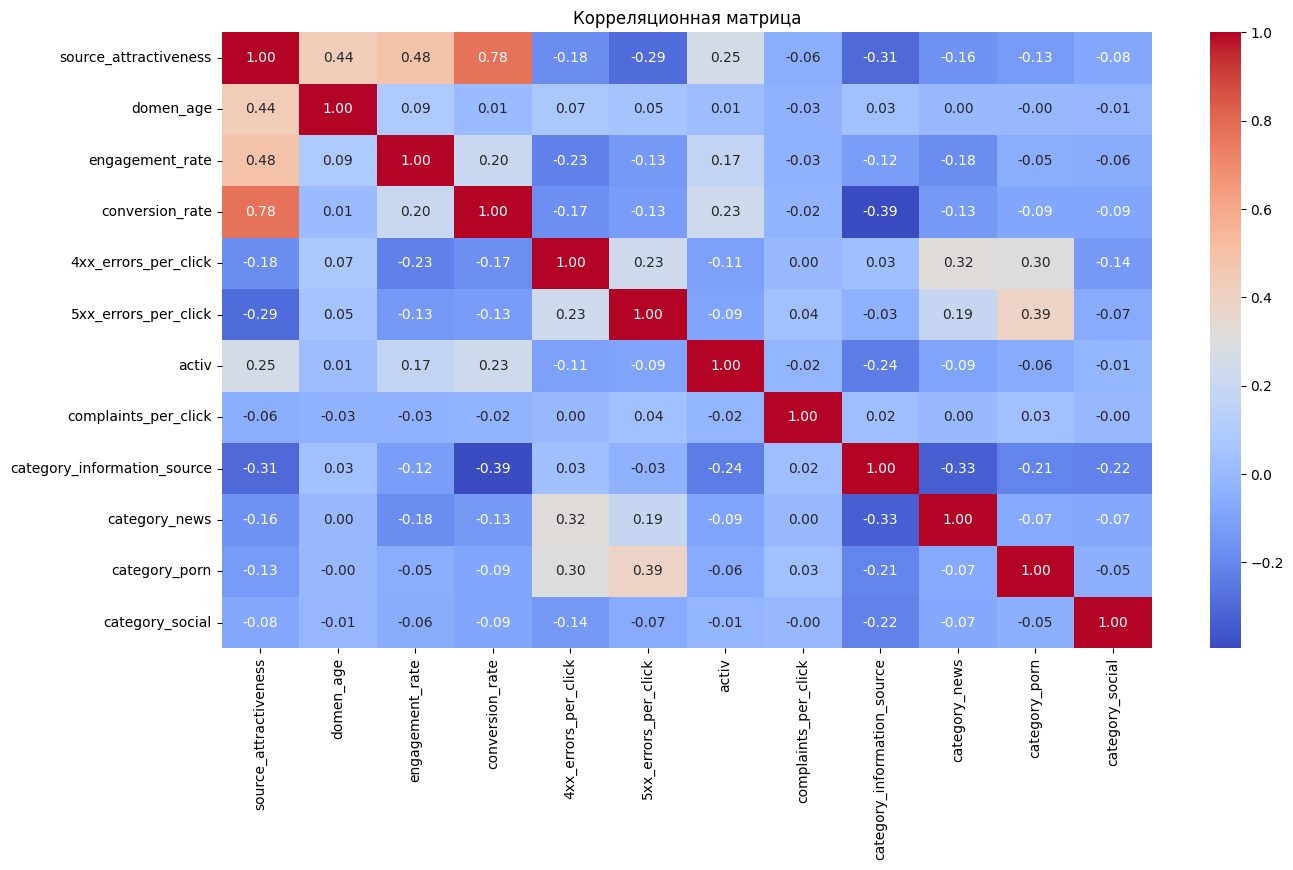

In [24115]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Корреляционная матрица")
plt.show()

Посмотрим на признаки с высокой корреляцией

In [24116]:
threshold = 0.9

corr_matrix = train_df.corr()

high_corr_pairs = corr_matrix[(corr_matrix > threshold) & (corr_matrix != 1.0)].stack()

print("Признаки с высокой корреляцией:")
print(high_corr_pairs)

Признаки с высокой корреляцией:
Series([], dtype: float64)


Таковых нет(((

In [24117]:
print(train_df.columns.tolist())

['source_attractiveness', 'domen_age', 'engagement_rate', 'conversion_rate', '4xx_errors_per_click', '5xx_errors_per_click', 'activ', 'complaints_per_click', 'category_information_source', 'category_news', 'category_porn', 'category_social']


In [24118]:
target_variable = 'source_attractiveness'
categorical_features = ['category_information_source', 'category_news', 'category_porn', 'category_social']

real_features = [feature for feature in train_df.columns if feature != target_variable and feature not in categorical_features]

print(real_features)


['domen_age', 'engagement_rate', 'conversion_rate', '4xx_errors_per_click', '5xx_errors_per_click', 'activ', 'complaints_per_click']


Посмотри на зависимость привлекательности домена от различных признаков

<Figure size 2000x2000 with 0 Axes>

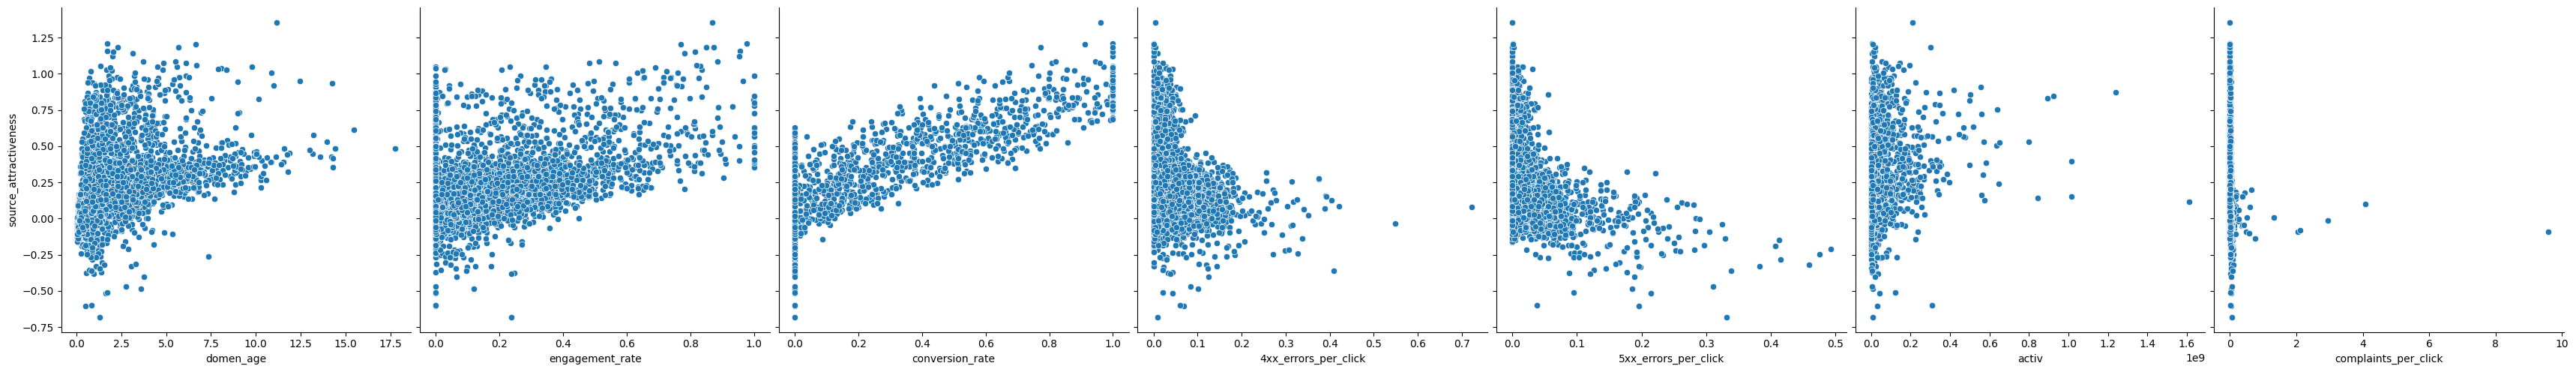

In [24119]:
plt.figure(figsize=(20, 20))
sns.pairplot(train_df, x_vars=real_features, y_vars=["source_attractiveness"], height=5)
plt.show()

Посмотрим на распределения признаков

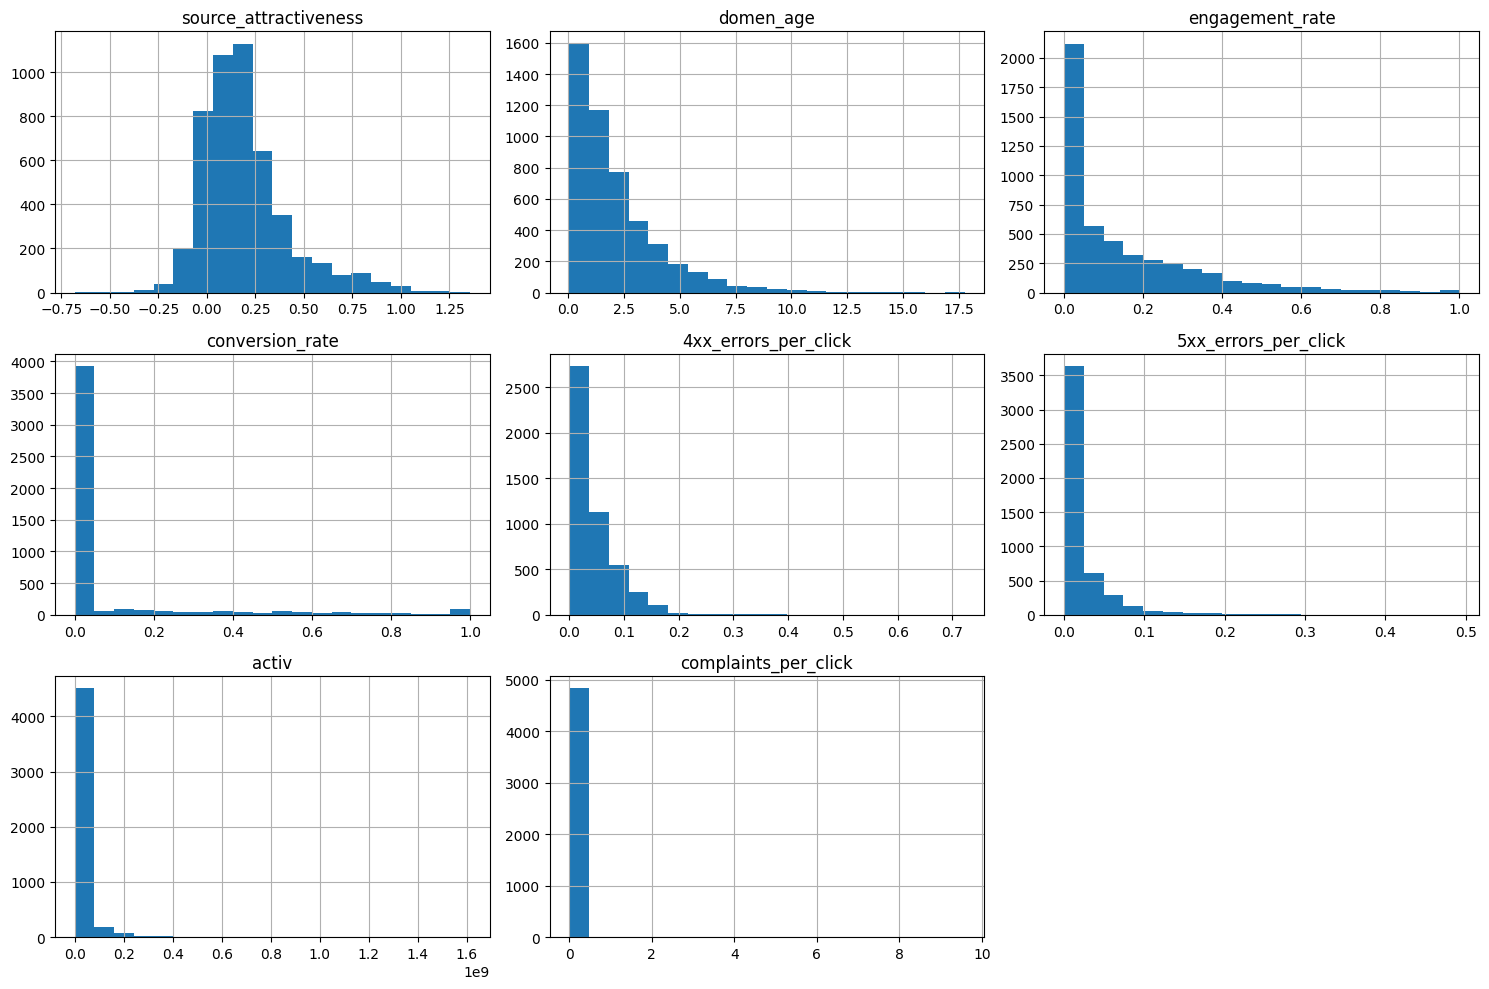

In [24120]:
train_df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

Нормализуем признаки

In [24121]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [24122]:
train_df[real_features] = np.log1p(train_df[real_features] )
test_df[real_features] = np.log1p(test_df[real_features])

scaler = StandardScaler()
train_df[real_features] = scaler.fit_transform(train_df[real_features])
test_df[real_features] = scaler.fit_transform(test_df[real_features])

Посмотрим на распределения признаков после нормализации

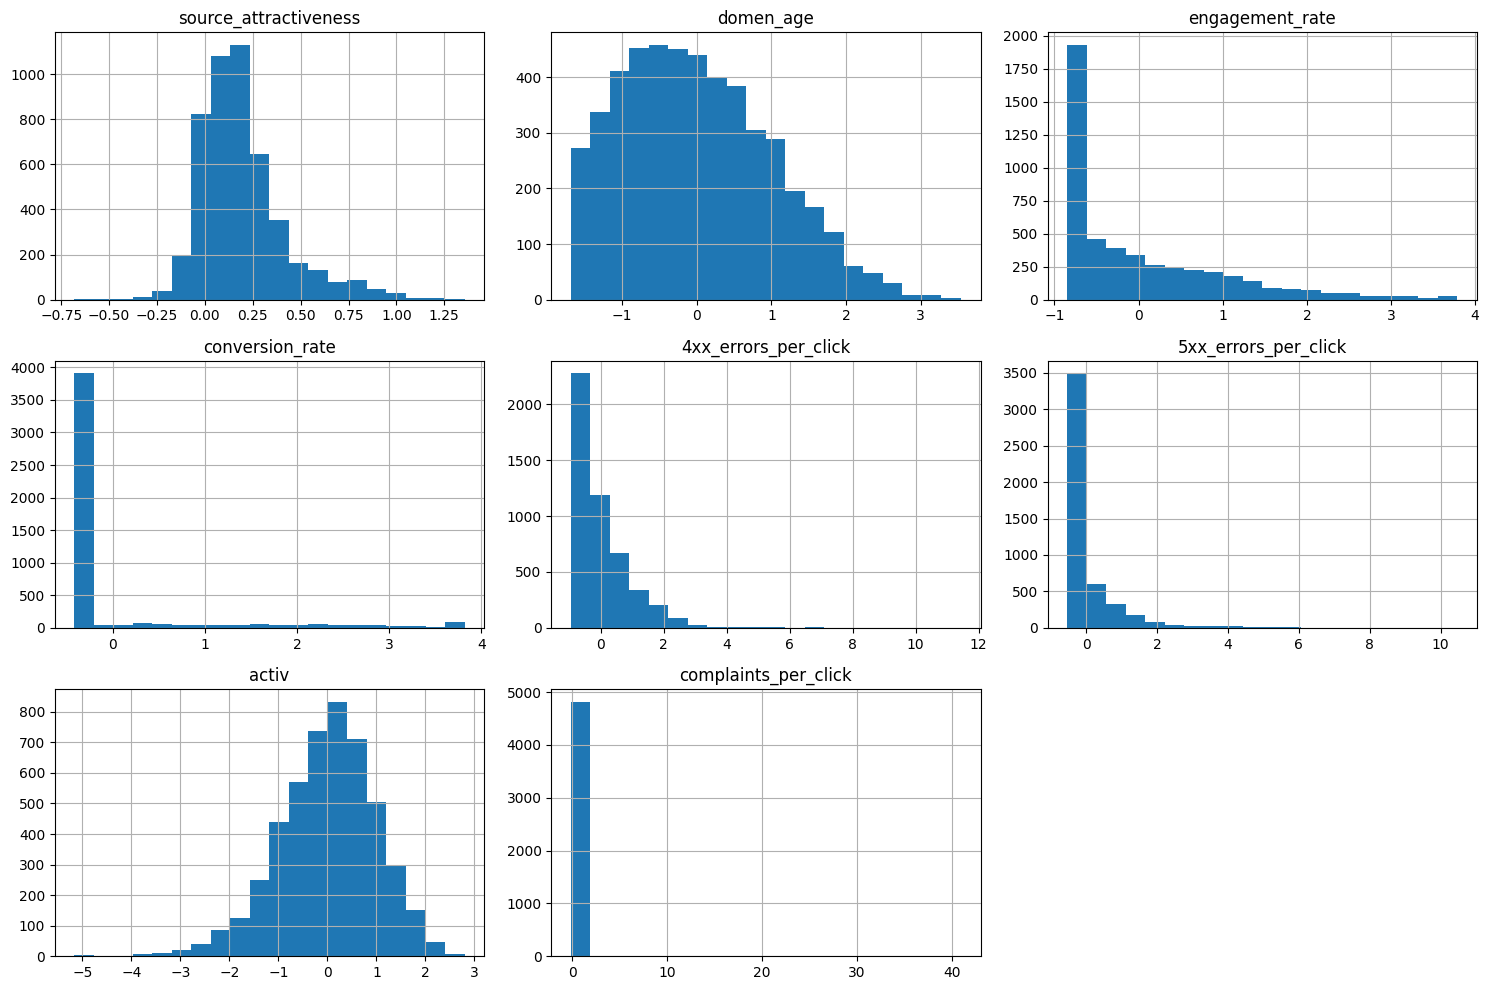

In [24123]:
train_df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

Посмотрим на выбросы

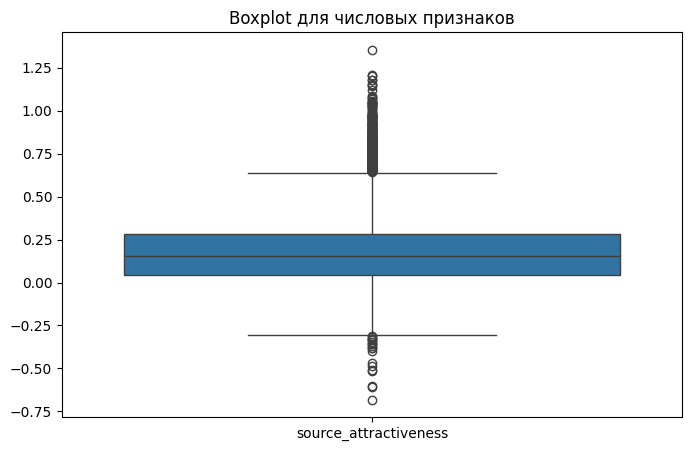

In [24124]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=train_df[["source_attractiveness"]])
plt.title("Boxplot для числовых признаков")
plt.show()


Удалим выбросы, используя межквартильный диапазон

In [24125]:
Q1 = train_df["source_attractiveness"].quantile(0.25)
Q3 = train_df["source_attractiveness"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


train_df = train_df[(train_df["source_attractiveness"] >= lower_bound) & (train_df["source_attractiveness"] <= upper_bound)]

Снова посмотрим на выбросы

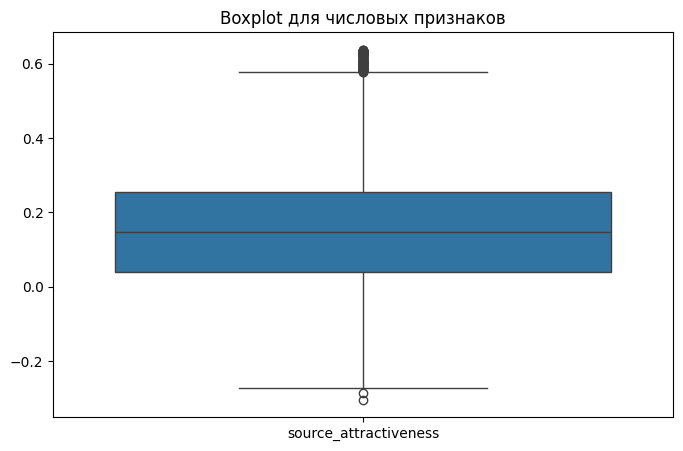

In [24126]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=train_df[["source_attractiveness"]])
plt.title("Boxplot для числовых признаков")
plt.show()


In [24127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score

Разделим на тестовую и обучающую выборки

In [24128]:
X = train_df.drop("source_attractiveness", axis=1)
y = train_df["source_attractiveness"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=True,
)

Теперь приступим к обучению

Подборка гиперпараметров

In [24129]:
param_grid = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 1.0, 10.0, 100.0]}
param_grid_elasticnet = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 1.0, 10.0, 100.0], 'l1_ratio': [0.5, 0.8, 1.0]}

In [24130]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error'),
    "Lasso": GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error'),
    "Elastic Net": GridSearchCV(ElasticNet(), param_grid_elasticnet, cv=5, scoring='neg_mean_squared_error')
}

In [24131]:
cv_scores = cross_val_score(models["Linear Regression"], X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Средний MSE на кросс-валидации: {-cv_scores.mean()}')

Средний MSE на кросс-валидации: 0.0024660631208451834


In [24132]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Оценка на тренировочных данных
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    
    # Оценка на тестовых данных
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    
    if hasattr(model, 'best_params_'):
        print(f'{model_name}: Лучшие параметры: {model.best_params_}, CV MSE = {-model.best_score_}')
    
    print(f"{model_name} - Training set: MSE = {mse_train}, R^2 = {r2_train}")
    print(f"{model_name} - Test set: MSE = {mse_test}, R^2 = {r2_test}\n")

Linear Regression - Training set: MSE = 0.002438629840713199, R^2 = 0.9096312423996918
Linear Regression - Test set: MSE = 0.0025791231595412556, R^2 = 0.9054195709361369

Ridge: Лучшие параметры: {'alpha': 1.0}, CV MSE = 0.002465981178222334
Ridge - Training set: MSE = 0.002438644719195206, R^2 = 0.9096306910450289
Ridge - Test set: MSE = 0.0025788106703995488, R^2 = 0.9054310303955238

Lasso: Лучшие параметры: {'alpha': 1e-05}, CV MSE = 0.0024659642067532436
Lasso - Training set: MSE = 0.002438640389489533, R^2 = 0.9096308514917338
Lasso - Test set: MSE = 0.002578854758556067, R^2 = 0.9054294136147412

Elastic Net: Лучшие параметры: {'alpha': 0.0001, 'l1_ratio': 0.5}, CV MSE = 0.002465797635961261
Elastic Net - Training set: MSE = 0.0024389143388915666, R^2 = 0.9096206996980118
Elastic Net - Test set: MSE = 0.0025779830566591685, R^2 = 0.9054613802694236



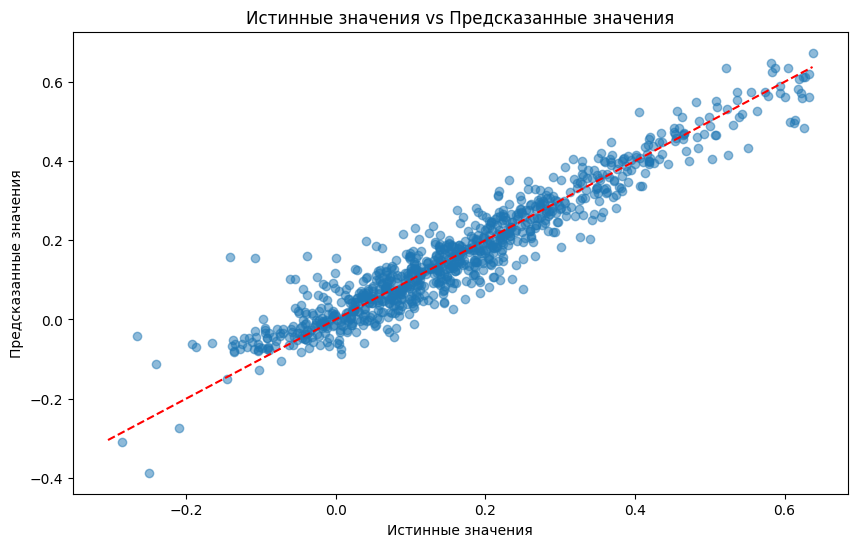

In [24133]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Истинные значения vs Предсказанные значения')
plt.show()

## Final model submit function

Принимает на вход путь к набору данных в формате `.csv`

На выходе получается файл с предиктами в формате `.csv`

Пример содержания:
```
0.432
0.412
0.312
```

Реализация модели - между ними

In [24134]:
X = test_df.drop(columns=['ID'], axis=1)


predicts = models["Ridge"].predict(X)

data = {
    " source_attractiveness": predicts
}
submit = pd.DataFrame(data)
submit.to_csv('submission.csv', index_label="ID")